# Importation 

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from karateclub import DeepWalk
import  umap
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
from karateclub import RandomWalker
import gensim
from gensim.models import Word2Vec

# Chargement des donnes

In [2]:
# load data
G=nx.karate_club_graph() 

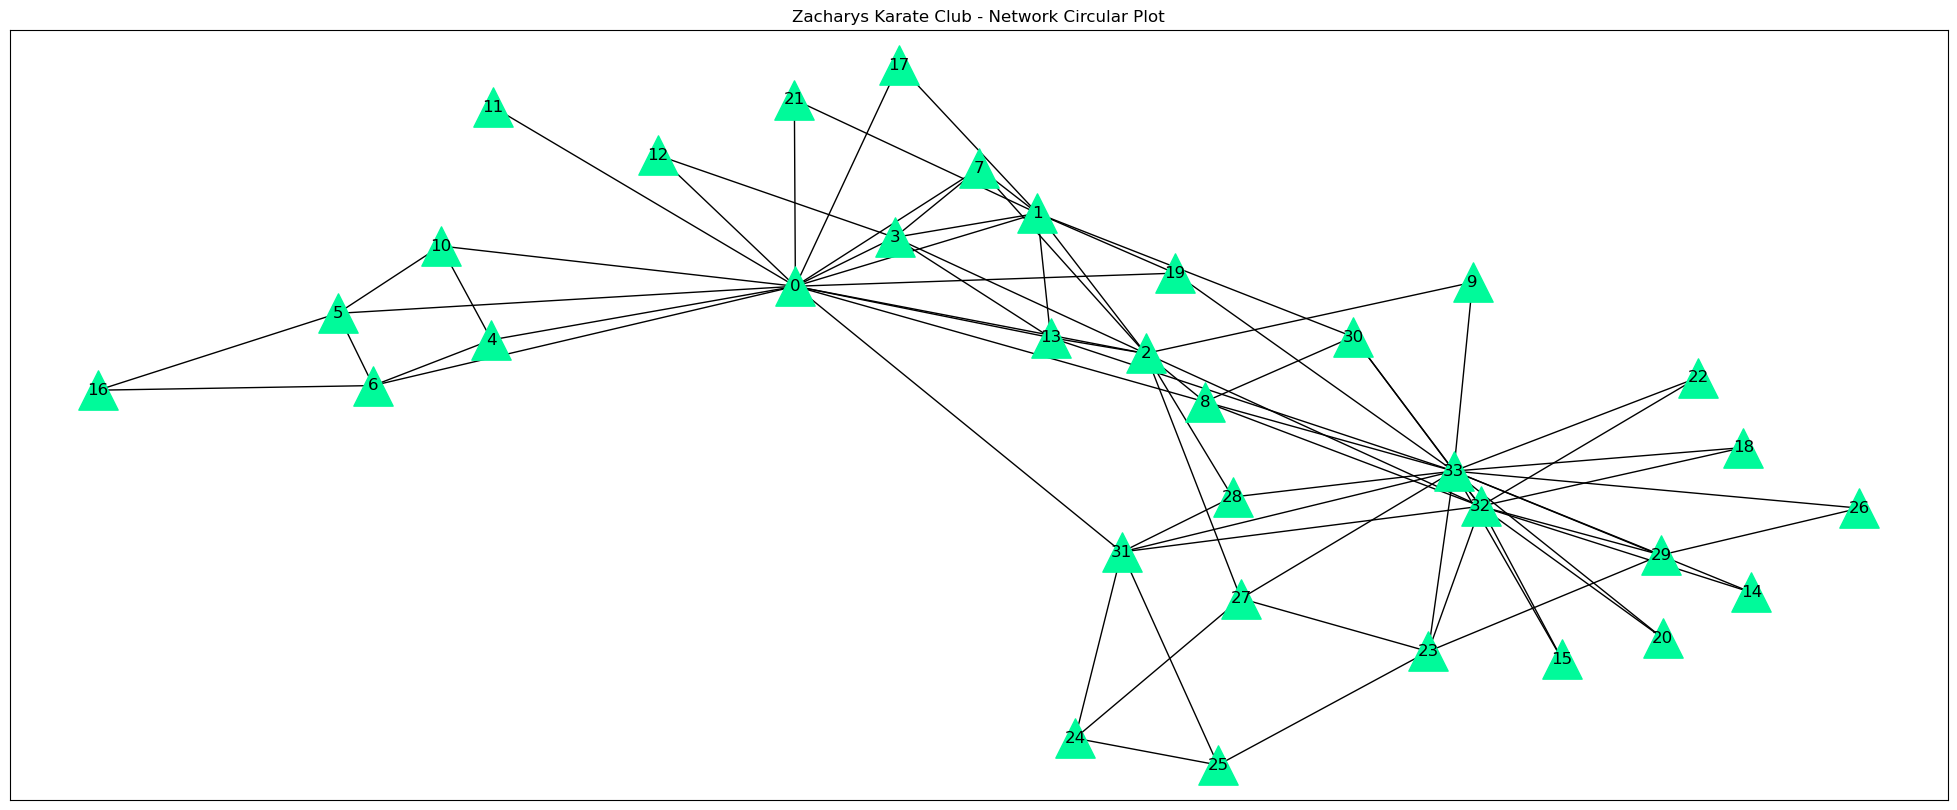

In [3]:
plt.figure(figsize=(25,10))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Circular Plot')
nx.draw_networkx(G, ax=ax, with_labels=True,node_color="mediumspringgreen", node_shape="^", node_size=800)

In [4]:
G.nodes(data=True)


NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [5]:
# liste à remplir avec des étiquettes pour la distinction des individus 
l=[]
for i in G.nodes(data=True):
    if i[1]['club']=="Mr. Hi": # nom du club de karaté, peut être 'Officier' ou 'Mr.Hi'
        l.append(0)
    else :
        l.append(1)

In [6]:
print(l)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


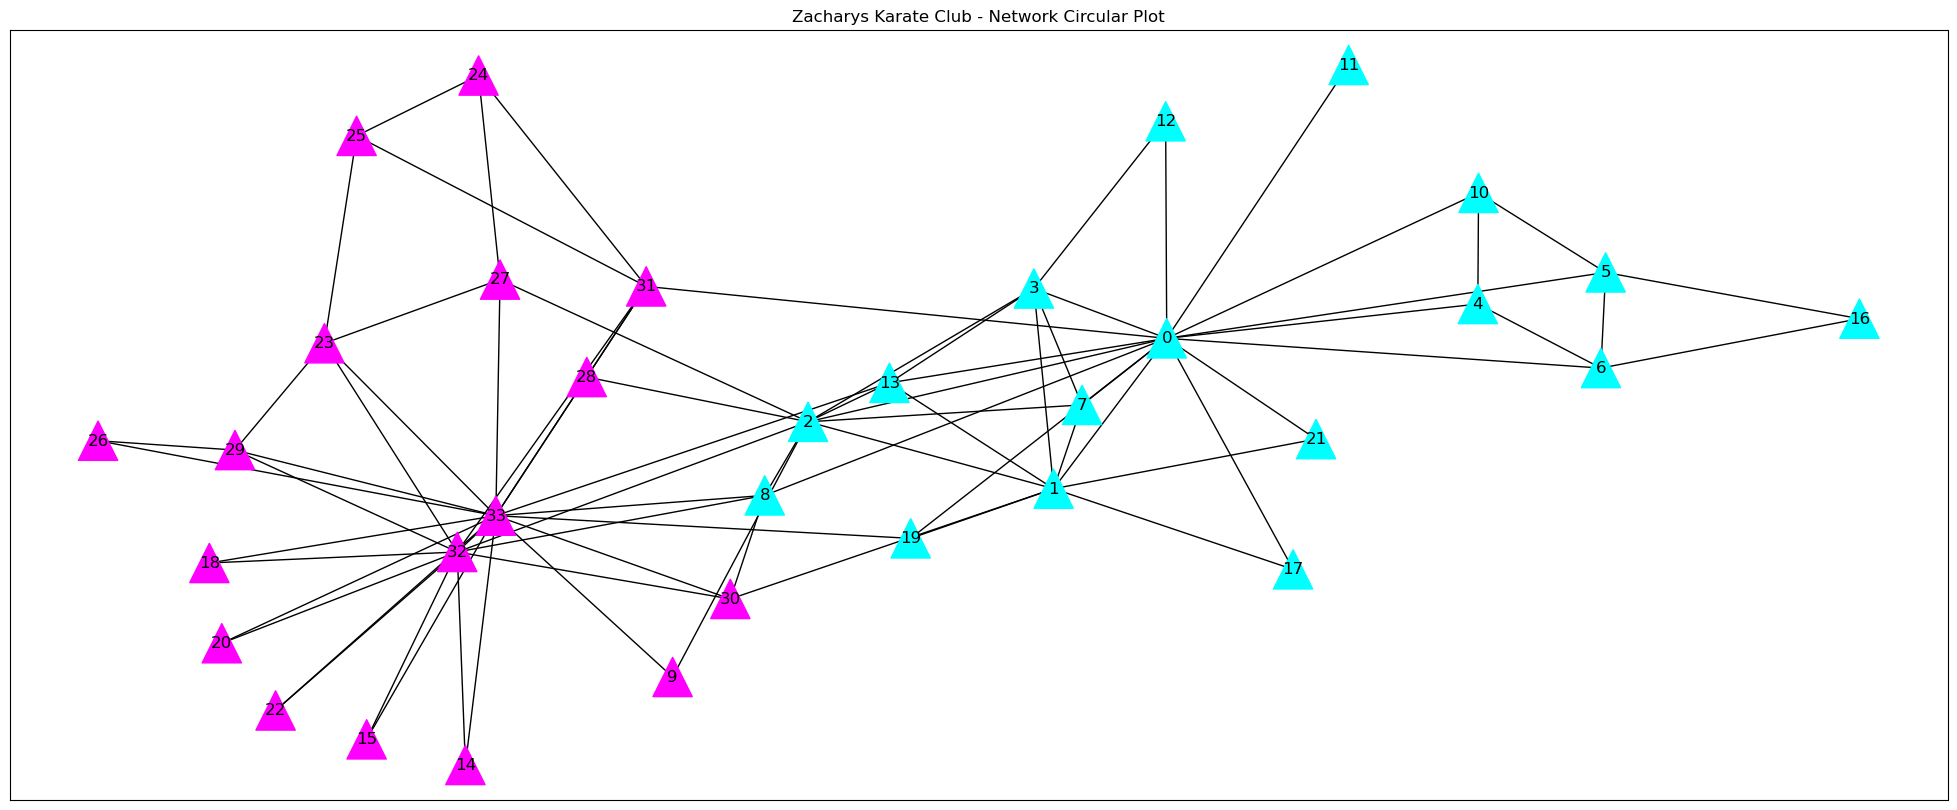

In [7]:
# affichage du graphe 
plt.figure(figsize=(25,10))
ax = plt.gca()
ax.set_title('Zacharys Karate Club - Network Circular Plot')
# Tracer le graphique
nx.draw_networkx(G, ax=ax, with_labels=True,node_color=l, node_shape="^", node_size=800,cmap='cool') 

les membres des clubs de karaté parlent principalement aux membres de leur club. Seuls quelques membres (nœuds) sont connectés aux nœuds de couleur opposée. Ces informations peuvent être très utiliser pour  classification 

# DeepWalk

In [8]:
# algorithme d'intégration de nœuds (node embeding)
model = DeepWalk()
model.fit(G) # fit le graphique
embedding = model.get_embedding() # extraction des embeding 

In [9]:
embedding.shape

(34, 128)

En utilisant DeepWalk chaque membre du club de karaté est maintenant représenté par un vecteur de taille 128

# Umap

In [10]:
scaledtfach = StandardScaler().fit_transform(embedding)#Standardisation des embeding 
reducer=umap.UMAP() #umap algorithme pour la reduction de dimension des embeding de 128 --> 2 
embedding = reducer.fit_transform(scaledtfach)
embedding.shape

(34, 2)

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

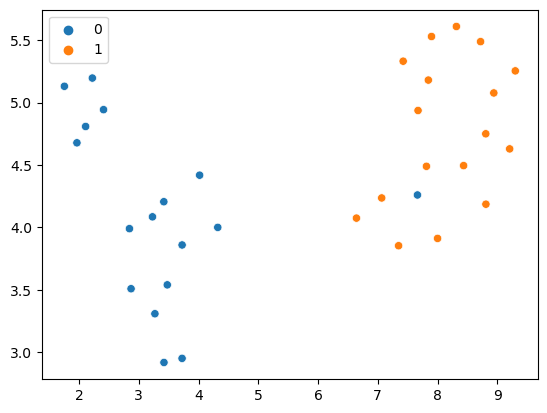

In [11]:
# representation des embeding reduites 
sns.scatterplot(embedding[:,0],embedding[:,1],hue=l)

la reduction de dimension par Umap nous a permis de bien separer les deux class 

# RandomWalk

In [12]:

mod=RandomWalker(10,5) # random walk du node 10 de longueur 5 
mod.do_walks(G) # execution de l'algorithme sur le graphe G 
var=mod.walks  # recuperation des marches 
var


[['0', '17', '17', '0', '8', '33', '28', '28', '2', '3'],
 ['0', '11', '0', '17', '1', '3', '3', '3', '13', '2'],
 ['0', '2', '9', '33', '20', '20', '33', '22', '22', '32'],
 ['0', '21', '1', '13', '13', '0', '8', '32', '33', '22'],
 ['0', '0', '5', '0', '13', '13', '33', '30', '33', '20'],
 ['1', '30', '32', '18', '18', '33', '29', '26', '29', '26'],
 ['1', '7', '3', '0', '17', '1', '21', '21', '21', '21'],
 ['1', '19', '33', '13', '1', '17', '17', '1', '1', '21'],
 ['1', '3', '1', '0', '10', '4', '4', '6', '4', '4'],
 ['1', '1', '1', '3', '0', '17', '1', '19', '0', '21'],
 ['2', '32', '30', '33', '18', '32', '20', '33', '15', '15'],
 ['2', '32', '32', '33', '33', '20', '32', '20', '20', '20'],
 ['2', '27', '33', '33', '32', '23', '23', '32', '23', '33'],
 ['2', '3', '2', '13', '0', '11', '0', '8', '30', '30'],
 ['2', '3', '0', '0', '10', '4', '0', '12', '0', '0'],
 ['3', '13', '1', '1', '2', '3', '1', '19', '0', '1'],
 ['3', '0', '3', '2', '8', '0', '21', '1', '3', '3'],
 ['3', '12',

# Skip_Gram

In [13]:
w2v = gensim.models.Word2Vec(var,hs=1,sg=1)# Word2Vec embeding avec  sg : SkipGram= True  et hs :hierarchicalSoftmax=True


In [14]:
embd=w2v.wv.vectors

In [15]:
embd.shape

(34, 100)

# Umap

In [16]:
scaledt = StandardScaler().fit_transform(embd)
reducer=umap.UMAP(n_neighbors=5)
embd = reducer.fit_transform(scaledt)
embd.shape

(34, 2)

C:\Users\MSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

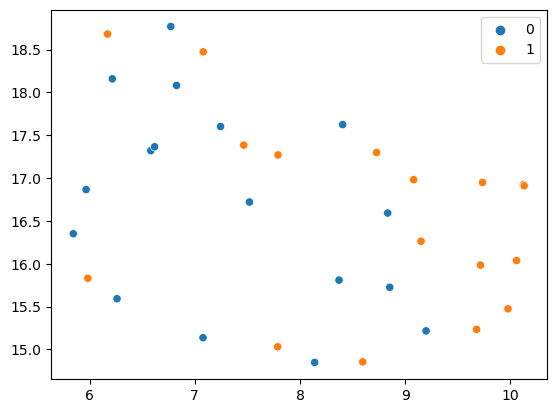

In [17]:
sns.scatterplot(embd[:,0],embd[:,1],hue=l)

In [18]:
w2v.wv.most_similar('0')

[('1', 0.9045767188072205),
 ('5', 0.8824648857116699),
 ('32', 0.8679999709129333),
 ('4', 0.8648081421852112),
 ('21', 0.8587061166763306),
 ('33', 0.8569758534431458),
 ('30', 0.8441603779792786),
 ('2', 0.8415541052818298),
 ('10', 0.8345879316329956),
 ('22', 0.8211986422538757)]

On peut utiliser Les Embeding  pour des modèles supervisés ou pour trouver des clusters dans l'ensemble de données.